In [ ]:
Q1. How can you create a Bokeh plot using Python code?

In [1]:
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
from bokeh.plotting import figure, output_file ,show

year=[2011,2012,2013,2014,2015,2016]
population=[78,85,67,91,105,150]

bplt=figure(title='Bar Plot')
bplt.xaxis.axis_label='year'
bplt.yaxis.axis_label='population'
bplt.vbar(x=year,top=population,width=0.5)
show(bplt)

In [ ]:
Q2. What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.
Ans : A Glyph is a vectorized shape or marker that is used to represent the data.

      Glyphs can be used to create a variety of plots, including scatter plots, line plots, 
      bar charts, and pie charts.

      we can add line glyph to plot line graph for the following data using line() function.
      
      x=[1,2,3,4,5,6]
      y=[5,4,2,1,6,9]

Explanation :

In [3]:
x=[1,2,3,4,5,6]
y=[5,4,2,1,6,9]

line_plt=figure(title='Bar Plot')

line_plt.xaxis.axis_label='x-axis'
line_plt.yaxis.axis_label='y-axis'

line_plt.line(x,y)  # adding glyph using line()

show(line_plt)

In [ ]:
Q3. How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?

In [4]:
bill=[110,120,150,160,180,210]
tips=[5,2,7,5,8,10]

bill_tip=figure(title="Total bill vs Tip")

bill_tip.xaxis.axis_label='total bill'
bill_tip.yaxis.axis_label='tips'

bill_tip.vbar(x=bill,top=tips,color='red',width=6,legend_label='Tip')

show(bill_tip)

In [ ]:
Q4. What is a Bokeh server, and how can you use it to create interactive plots that can be updated in real time?
Ans :
    The Bokeh is used to make it easy for python developers to create interactive web applications that can 
    connect front-end UI events to realtime running python code.

    I have created below realtime interactive plot using bokeh server in Pycharm.

In [5]:
from bokeh.io import curdoc
from bokeh.models import ColumnDataSource, Slider
from bokeh.plotting import figure
from bokeh.layouts import column
from random import randint

source = ColumnDataSource(data=dict(x=[], y=[]))

p = figure(plot_height=400, plot_width=800)
p.circle('x', 'y', source=source, size=10, color='red')

# This function helps to generate and update new data
def update_data(attrname, old, new):
    new_data = dict(x=[randint(0, 10) for _ in range(new)], y=[randint(0, 10) for _ in range(new)])
    source.data = new_data

# Bind the callback function to the slider value change event
slider = Slider(title="Number of Data Points", start=1, end=100, value=10, step=1)
slider.on_change('value', update_data)

# Add slider and plot to the layout
layout = column(slider, p)
curdoc().title = "Real-time data analysis"
curdoc().add_root(layout)

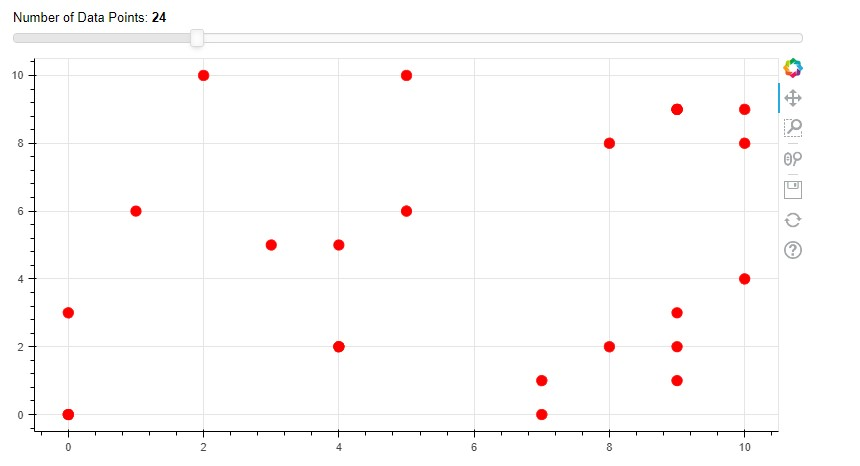

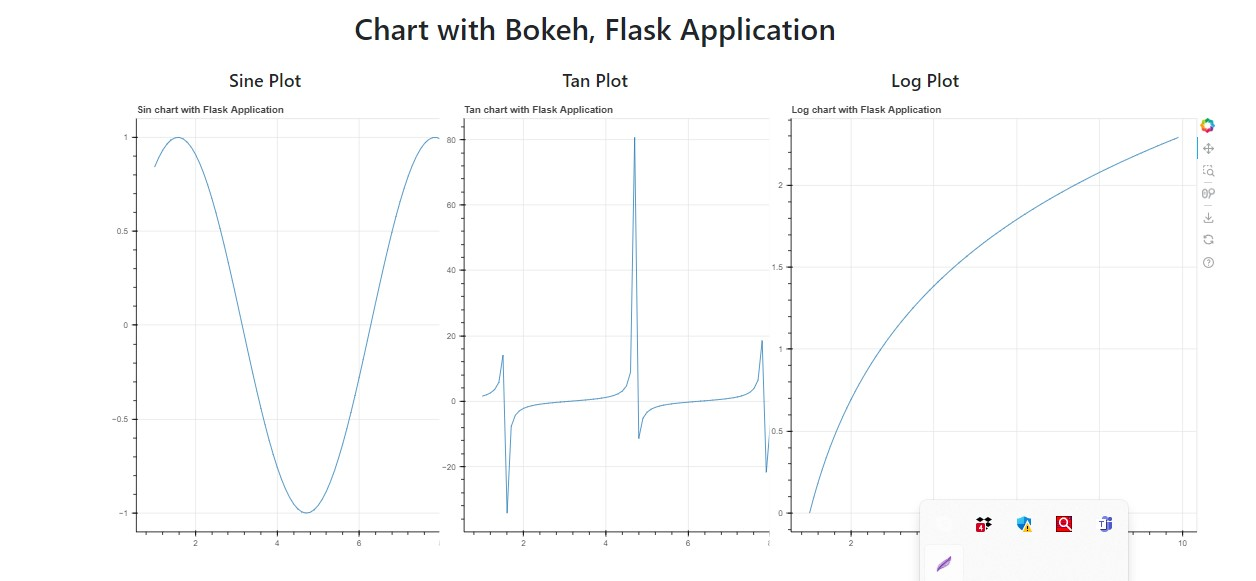

In [ ]:
Q5. How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?
Ans :
  I have made this bokeh plot using Flask application.
  The plot is made for sin, tan and log of x-values.
  This application has two files :
     1. main.py file -> bokeh code
     2. index.html -> plot in html file

In [ ]:
main.py -> 
from flask import Flask, render_template
from bokeh.embed import components
from bokeh.plotting import figure
import numpy as np

# Flask constructor
app = Flask(__name__)


# Root endpoint
@app.route('/')
def page():

    # defining data
    x = np.arange(1, 10, 0.1)
    y1 = np.sin(x)
    y2 = np.tan(x)
    y3 = np.log(x)

    # Defining figures
    p1 = figure(title="Sin chart with Flask Application")
    p1.line(x,y1)

    p2 = figure(title="Tan chart with Flask Application")
    p2.line(x, y2)

    p3 = figure(title="Log chart with Flask Application")
    p3.line(x, y3)


    script1, div1 = components(p1)
    script2, div2 = components(p2)
    script3, div3 = components(p3)

    return render_template(
        template_name_or_list='index.html',
        script=[script1,script2,script3],
        div=[div1,div2,div3],
    )


if __name__ == '__main__':
    app.run()

In [ ]:
index.html -> 

<!DOCTYPE html>
<html lang="en">

<head>
	<meta charset="utf-8">
	<meta name="viewport" content="width=device-width, initial-scale=1">

	<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css" rel="stylesheet"
		integrity="sha384-Zenh87qX5JnK2Jl0vWa8Ck2rdkQ2Bzep5IDxbcnCeuOxjzrPF/et3URy9Bv1WTRi" crossorigin="anonymous">

	<!-- <link href="http://cdn.bokeh.org/bokeh/release/bokeh-3.0.1.min.css" rel="stylesheet" type="text/css"> -->
	<script src="https://cdnjs.cloudflare.com/ajax/libs/bokeh/3.0.1/bokeh.min.js"
		integrity="sha512-p7EUyPmeDeOwHiu7fIZNboAcQLxei3sWtXoHoShWWiPNUSRng/Xs5JPcaFPRa4dKy9IuHjyIQuLE4caGCwuewA=="
		crossorigin="anonymous" referrerpolicy="no-referrer"></script>

	<title>Bokeh Charts</title>
</head>

<body>

	<div class="container">
		<h1 class="text-center py-4">Responsive Chart with Bokeh, Flask</h1>
		<div class="row mb-5">
			<div class="col-md-4">
				<h4 class="text-center">Sine Plot</h4>
				{{ div[0] | safe }}
				{{ script[0] | safe }}
			</div>

				<div class="col-md-4">
				<h4 class="text-center">Tan Plot</h4>
				{{ div[1] | safe }}
				{{ script[1] | safe }}
			</div>

				<div class="col-md-4">
				<h4 class="text-center">Log Plot</h4>
				{{ div[2] | safe }}
				{{ script[2] | safe }}
			</div>
		</div>
	</div>

</body>

</html>

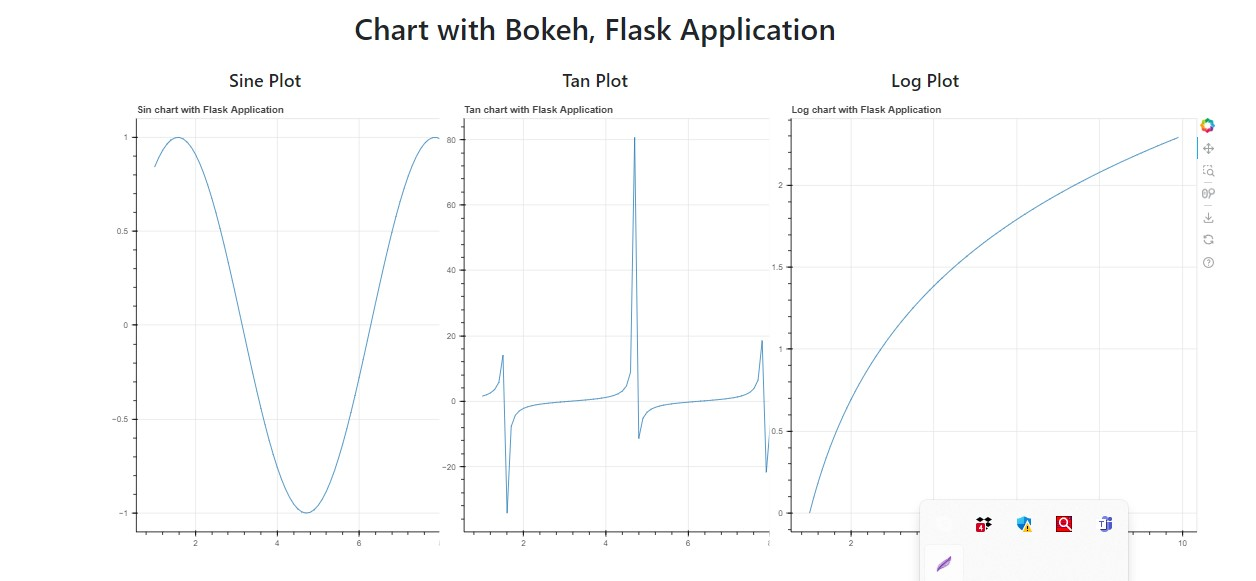